In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import pandas as pd
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [2]:
#read the file
df = pd.read_csv('resources/apple.csv')
df.drop(['Year', 'Quarter', 'Unnamed: 0'], axis = 1, inplace = True)
#print the head
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2017-01-03,115.800003,116.330002,114.760002,116.150002,110.953873,28781900
1,2017-01-04,115.849998,116.510002,115.750000,116.019997,110.829704,21118100
2,2017-01-05,115.919998,116.860001,115.809998,116.610001,111.393303,22193600
3,2017-01-06,116.779999,118.160004,116.470001,117.910004,112.635139,31751900
4,2017-01-09,117.949997,119.430000,117.940002,118.989998,113.666824,33561900


In [3]:
 #Input paramaters
test_size = 0.2                 # proportion of dataset for test set
cv_size = 0.2                   # proportion of dataset for cross-validation set
# Get sizes of each of the datasets
num_cv = int(cv_size*len(df)) # 151
num_test = int(test_size*len(df)) # 151
num_train = len(df) - num_cv - num_test # 457

In [4]:
# Split df into train, cv, and test
train = df[ : num_train].copy()
cv = df[num_train : num_train + num_cv].copy()
train_cv = df[:num_train+num_cv].copy()
test = df[num_train+num_cv:].copy()
train.shape

(457, 7)

In [5]:
# here is your X training data
X_train = train.drop(['Date'], axis = 1)
print(X_train.shape)
# here is your y training data (it's just Adj_Close)
y_train = train['Adj_Close']
print(y_train.shape)

(457, 6)
(457,)


In [35]:
regr = RandomForestRegressor() #make random forest
score_list = []
N = 100 # the number of days we use to predict
# loop through the days in the training set; start with 
for i in range(N, num_train - 1):
    # your training set is your data from (i - N to i)
    # try to predict y data which is one day ahead
    X_train_temp = X_train[i-N: i]
    y_train_temp = y_train[i-(N-1): i+1]
    # your test set is one step in the future (i+1)
    X_test_temp = X_train[i-(N-1): i+1]
    y_test_temp = y_train[i-(N-1): i+1]

    # Train the model
    regr.fit(X_train_temp, y_train_temp)
    score = regr.score(X_test_temp, y_train_temp)
    score_list.append(score) 
  

C:\Users\IEshun\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
score_list

[0.9898099965409443,
 0.9900795177321935,
 0.990684247017456,
 0.9922310118499537,
 0.9885454637378737,
 0.9918314141500556,
 0.9893659328925846,
 0.9899098764110759,
 0.9902475629783787,
 0.9885071951001716,
 0.9854580292088577,
 0.9851582854281846,
 0.9843695218763981,
 0.9842950608319491,
 0.9819908581366014,
 0.9806642371765363,
 0.9764856872107043,
 0.9776361541689922,
 0.9708391791257128,
 0.9761801845574937,
 0.9745834603638287,
 0.9766350889795862,
 0.9764678403759706,
 0.9674032290959133,
 0.9710546310492087,
 0.9722936406183976,
 0.9691091256227049,
 0.9628651868949579,
 0.9633987738327097,
 0.9647720902465652,
 0.9634373933814587,
 0.9604789925055157,
 0.9663549643654973,
 0.9497429377712202,
 0.9570836416003343,
 0.9586523174548789,
 0.9526656468025543,
 0.9483842219998547,
 0.9611077487676851,
 0.9402072314993247,
 0.9548920858306753,
 0.946105953826763,
 0.9518706174685917,
 0.9550936439699697,
 0.9475722224446018,
 0.9476071527045483,
 0.9221903520029617,
 0.919276283336

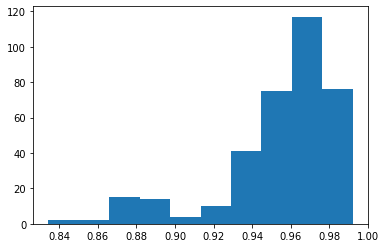

In [42]:
plt.hist(score_list)
plt.savefig("images/forest.png")

In [39]:
predictions = regr.predict(X_test_temp)
predictions

array([187.8668444, 188.4900515, 188.5810488, 187.547913 , 187.1976609,
       188.115341 , 187.3258226, 186.4756499, 186.3083513, 184.3536148,
       182.698267 , 181.3706635, 182.0594205, 180.8668105, 180.1399032,
       180.5312515, 180.5439668, 180.7768141, 180.8286651, 181.6318803,
       180.9470416, 181.8040651, 183.0406817, 184.9191042, 185.4454651,
       184.5453733, 185.2664094, 187.0577485, 186.859158 , 186.5265061,
       186.6086884, 188.1584064, 187.4794374, 187.4432115, 187.2915771,
       190.0289919, 188.7649675, 187.1252778, 186.405208 , 189.4585942,
       194.9510166, 201.6262267, 203.6102908, 203.7949907, 203.0666807,
       203.0761767, 204.2061521, 203.974501 , 204.0554887, 204.9359052,
       206.9643831, 207.7474657, 212.2796756, 213.0179808, 212.6527529,
       211.2802443, 211.4314363, 211.979268 , 213.6423797, 214.9216311,
       218.232169 , 219.1491351, 221.6310578, 223.5357039, 223.7575913,
       220.7268631, 218.8320342, 217.6136506, 219.769638 , 217.0

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test_temp, predictions)

0.9806487833551983

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_temp, predictions)

4.645429216442841